# KMeans Clustering of Financial Metrics
This notebook fetches financial metrics for selected tickers, preprocesses the data, applies KMeans clustering, and visualizes the results.

In [4]:
from src.kmean_modeling import calculate_inertia, apply_kmeans_and_visualize
from src.data_processing import fetch_financial_metrics
from src.preprocessing import create_preprocessor, preview_transformation
import pandas as pd
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # Adjust to your physical core count

## Define Tickers

In [1]:
tickers = [
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'TSLA', 'META',
    'BRK-B', 'JPM', 'V', 'JNJ', 'WMT', 'UNH', 'LLY', 'XOM', 'MA',
    'PG', 'HD', 'BAC', 'DIS', 'NFLX', 'ADBE', 'CRM', 'CSCO', 'NKE',
    'KO', 'MCD', 'PFE', 'ORCL'
]

## Fetch Financial Metrics

In [5]:
data = fetch_financial_metrics(tickers)
data.head()

,ticker,roe,debt_to_equity,profit_margins,beta,market_cap,net_income,total_equity,total_debt
0,AAPL,1.49814,154.486,0.24296,1.094,3840247332864,9.373600e+10,5.695000e+10,3.080300e+11
1,MSFT,0.33281,32.661,0.36146,1.023,3865413943296,1.018320e+11,3.434790e+11,2.755240e+11
2,GOOGL,0.34829,11.481,0.31118,1.000,2971275624448,1.001180e+11,3.250840e+11,1.251720e+11
3,AMZN,0.24770,47.808,0.10540,1.281,2374755942400,5.924800e+10,2.859700e+11,3.389240e+11
4,NVDA,1.09417,10.584,0.52414,2.123,4592542679040,7.288000e+10,7.932700e+10,3.227400e+10


## Preprocessing (ROE and Debt-to-Equity only)

In [16]:
num_cols = ['roe', 'debt_to_equity']
for col in num_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')
    data[col].fillna(data[col].median(), inplace=True)

preprocessor = create_preprocessor(num_cols=num_cols)
scaled_features = preview_transformation(preprocessor, data[num_cols])

df_processed = pd.DataFrame(scaled_features, columns=num_cols)
df_processed['ticker'] = data['ticker'].values
df_processed.head()

C:\Users\andre\AppData\Local\Temp\ipykernel_15780\3563364498.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
C:\Users\andre\AppData\Local\Temp\ipykernel_15780\3563364498.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

,roe,debt_to_equity,ticker
0,0.762403,0.252457,AAPL
1,0.135130,0.038731,MSFT
2,0.143462,0.001574,GOOGL
3,0.089317,0.065304,AMZN
4,0.544954,0.000000,NVDA


## KMeans Clustering and Visualization

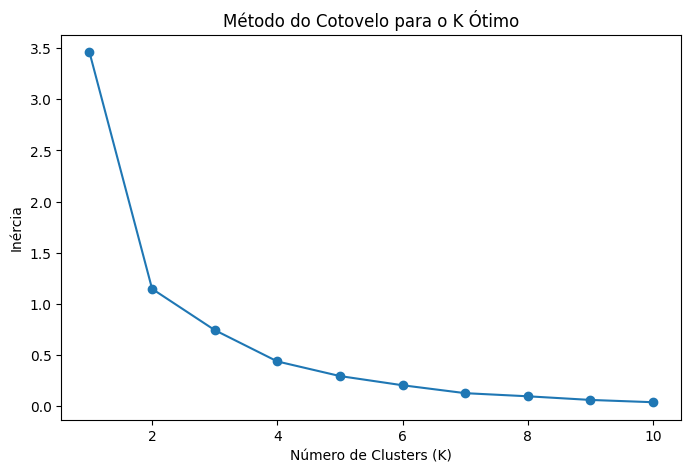

In [18]:

calculate_inertia(pd.DataFrame(scaled_features, columns=num_cols))


Médias dos Clusters (por ROE e D/E quando disponíveis):
              roe  debt_to_equity
Cluster                          
0        1.735717       325.33200
1        0.258647        55.14263
2        0.883167       227.00300


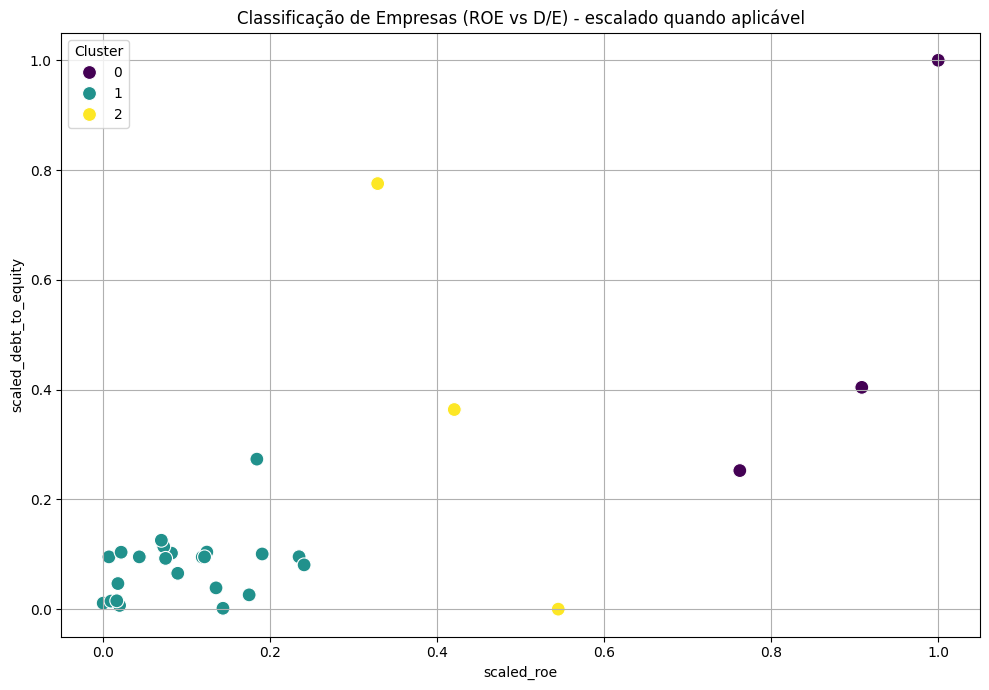

In [37]:
results = apply_kmeans_and_visualize(df_processed, data, optimal_k=3)


Médias dos Clusters (por ROE e D/E quando disponíveis):
              roe  debt_to_equity
Cluster                          
0        0.316239        59.87022
1        1.939540       580.59100
2        1.633805       197.70250
3        0.692420       452.53400


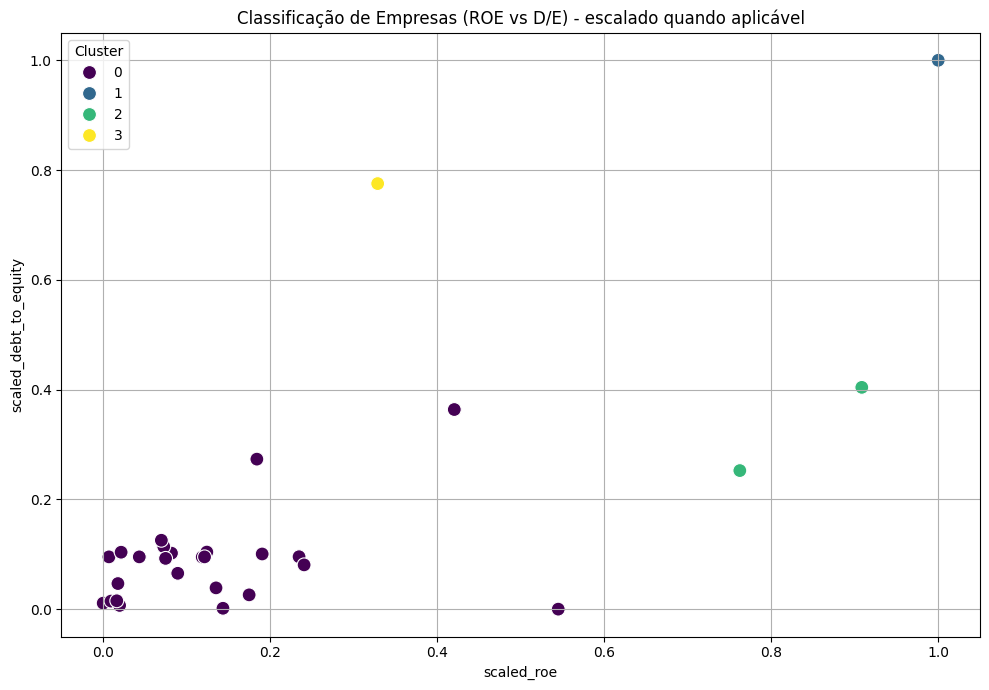

In [39]:
results = apply_kmeans_and_visualize(df_processed, data, optimal_k=4)


Médias dos Clusters (por ROE e D/E quando disponíveis):
              roe  debt_to_equity
Cluster                          
0        0.202052       49.282361
1        1.735717      325.332000
2        0.692420      452.534000
3        0.567688       65.297000
4        0.862910      217.891000


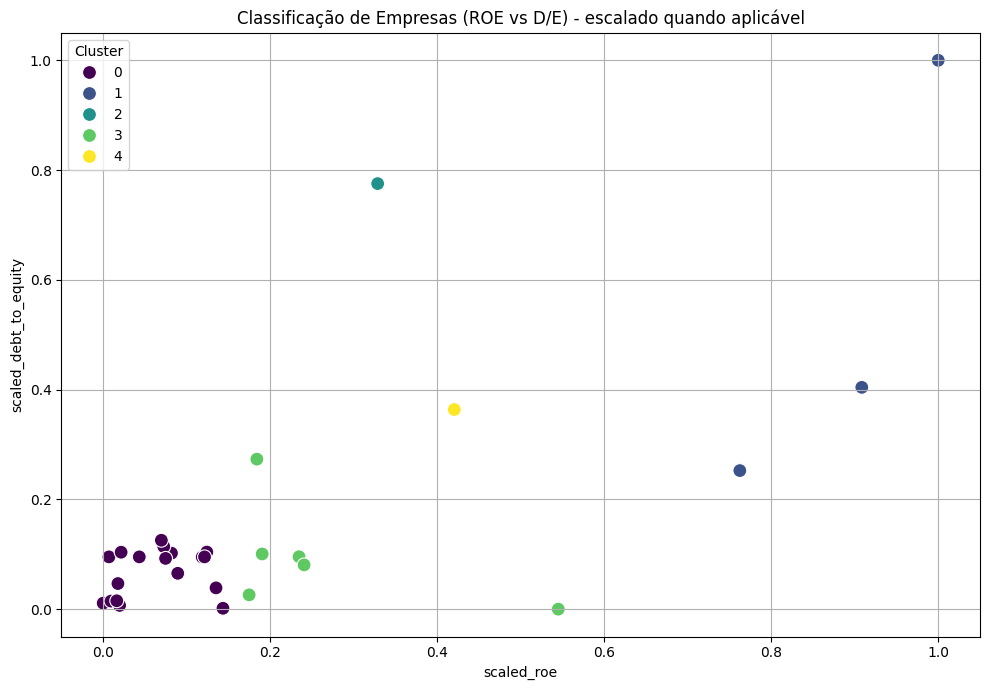

In [27]:
results = apply_kmeans_and_visualize(df_processed, data, optimal_k=5)


Médias dos Clusters (por ROE e D/E quando disponíveis):
              roe  debt_to_equity
Cluster                          
0        0.148610       29.022000
1        0.213210      202.724667
2        0.047702       47.700500
3        0.242087       76.991750
4        0.176870      471.781000
5        0.479370       87.985000
6        0.139221      105.897111
7        0.323230        7.280000


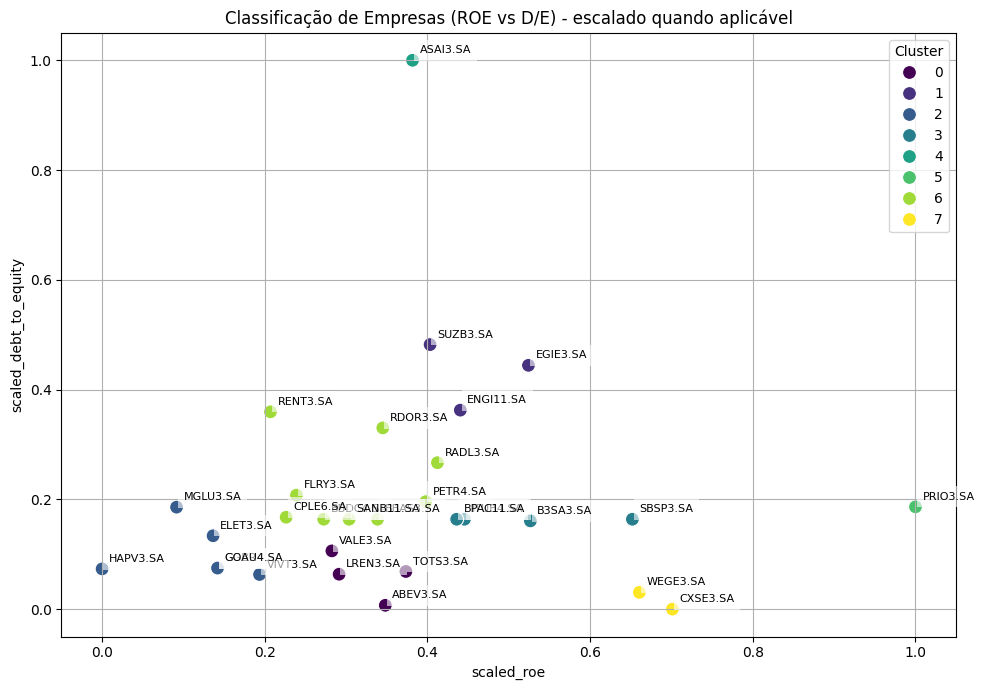

In [13]:
results = apply_kmeans_and_visualize(df_processed, data, optimal_k=8)

## Show the Head of Each Cluster

In [40]:
for cluster_id in sorted(results['Cluster'].unique()):
    print(f"\nCluster {cluster_id}:")
    display(results[results['Cluster'] == cluster_id].head())


Cluster 0:


,ticker,roe,debt_to_equity,profit_margins,beta,market_cap,net_income,total_equity,total_debt,scaled_roe,scaled_debt_to_equity,Cluster
1,MSFT,0.33281,32.661,0.36146,1.023,3865413943296,1.018320e+11,3.434790e+11,2.755240e+11,0.135130,0.038731,0
2,GOOGL,0.34829,11.481,0.31118,1.000,2971275624448,1.001180e+11,3.250840e+11,1.251720e+11,0.143462,0.001574,0
3,AMZN,0.24770,47.808,0.10540,1.281,2374755942400,5.924800e+10,2.859700e+11,3.389240e+11,0.089317,0.065304,0
4,NVDA,1.09417,10.584,0.52414,2.123,4592542679040,7.288000e+10,7.932700e+10,3.227400e+10,0.544954,0.000000,0
5,TSLA,0.08177,16.823,0.06344,2.086,1423749808128,7.130000e+09,7.368000e+10,4.839000e+10,0.000000,0.010945,0



Cluster 1:


,ticker,roe,debt_to_equity,profit_margins,beta,market_cap,net_income,total_equity,total_debt,scaled_roe,scaled_debt_to_equity,Cluster
17,HD,1.93954,580.591,0.08863,1.001,394118365184,1.480600e+10,6.640000e+09,8.947900e+10,1.0,1.0,1



Cluster 2:


,ticker,roe,debt_to_equity,profit_margins,beta,market_cap,net_income,total_equity,total_debt,scaled_roe,scaled_debt_to_equity,Cluster
0,AAPL,1.49814,154.486,0.24296,1.094,3840247332864,9.373600e+10,5.695000e+10,3.080300e+11,0.762403,0.252457,2
15,MA,1.76947,240.919,0.44926,0.967,525371015168,1.287400e+10,6.515000e+09,4.156600e+10,0.908455,0.404092,2



Cluster 3:


,ticker,roe,debt_to_equity,profit_margins,beta,market_cap,net_income,total_equity,total_debt,scaled_roe,scaled_debt_to_equity,Cluster
28,ORCL,0.69242,452.534,0.2108,1.531,825447022592,1.244300e+10,2.096900e+10,1.473920e+11,0.328701,0.775341,3


In [16]:
for cluster_id in sorted(results['Cluster'].unique()):
    print(f"\nCluster {cluster_id}:")
    display(results[results['Cluster'] == cluster_id].head())


Cluster 0:


,ticker,roe,debt_to_equity,profit_margins,beta,market_cap,net_income,total_equity,total_debt,scaled_roe,scaled_debt_to_equity,Cluster
9,SUZB3.SA,0.18742,227.437,0.15256,0.347,61671845888,-7.074198e+09,3.241558e+10,1.335205e+11,0.403234,0.481996,0
12,EGIE3.SA,0.24659,209.629,0.25270,0.379,33208260608,4.279349e+09,1.228040e+10,3.783190e+10,0.524181,0.444244,0
25,ENGI11.SA,0.20562,171.108,0.09726,0.354,23249655808,3.789678e+09,2.214322e+10,5.503843e+10,0.440436,0.362580,0



Cluster 1:


,ticker,roe,debt_to_equity,profit_margins,beta,market_cap,net_income,total_equity,total_debt,scaled_roe,scaled_debt_to_equity,Cluster
0,VALE3.SA,0.12837,50.133,0.13814,1.039,245796290560,6.166000e+09,3.452800e+10,4.562400e+10,0.282531,0.106116,1
3,BBDC4.SA,0.12346,77.350,0.23561,0.384,173472546816,1.725290e+10,1.689425e+11,1.900542e+12,0.272495,0.163815,1
5,ABEV3.SA,0.16049,3.388,0.16084,0.362,188510748672,1.443720e+10,9.958050e+10,6.292780e+10,0.348187,0.007017,1
8,ELET3.SA,0.05690,63.152,0.15169,0.234,118818570240,1.037812e+10,1.219998e+11,1.678716e+11,0.136442,0.133715,1
11,GGBR4.SA,0.05977,35.410,0.04731,0.869,31743322112,4.566317e+09,5.817379e+10,2.864071e+10,0.142308,0.074903,1



Cluster 2:


,ticker,roe,debt_to_equity,profit_margins,beta,market_cap,net_income,total_equity,total_debt,scaled_roe,scaled_debt_to_equity,Cluster
7,WEGE3.SA,0.31330,14.482,0.15650,0.053,153520504832,6.042593e+09,2.312522e+10,1.836448e+10,0.660541,0.030536,2
21,SBSP3.SA,0.30910,77.350,0.27755,0.137,90339500032,9.579563e+09,3.692805e+10,4.403738e+10,0.651956,0.163815,2
28,CXSE3.SA,0.33316,0.078,0.76524,0.328,45329997824,3.765184e+09,1.288932e+10,1.134692e+09,0.701137,0.000000,2



Cluster 3:


,ticker,roe,debt_to_equity,profit_margins,beta,market_cap,net_income,total_equity,total_debt,scaled_roe,scaled_debt_to_equity,Cluster
29,ASAI3.SA,0.17687,471.781,0.01209,0.49,12790875136,769000000.0,5.255000e+09,4.033800e+10,0.381669,1.0,3



Cluster 4:


,ticker,roe,debt_to_equity,profit_margins,beta,market_cap,net_income,total_equity,total_debt,scaled_roe,scaled_debt_to_equity,Cluster
1,PETR4.SA,0.18483,92.443,0.15185,0.319,431181889536,7.528000e+09,5.935000e+10,1.222950e+11,0.397940,0.195812,4
2,ITUB4.SA,0.20809,77.350,0.31790,0.302,393762668544,4.108500e+10,2.212840e+11,2.633191e+12,0.445485,0.163815,4
4,BBAS3.SA,0.15581,77.350,0.30000,0.319,126098341888,2.635886e+10,1.842363e+11,2.214483e+12,0.338621,0.163815,4
6,RENT3.SA,0.09141,169.658,0.05876,0.253,41599188992,1.813627e+09,2.634271e+10,6.090089e+10,0.206983,0.359506,4
10,B3SA3.SA,0.24775,75.917,0.49303,0.336,69258878976,4.576581e+09,1.838345e+10,2.684540e+10,0.526552,0.160777,4



Cluster 5:


,ticker,roe,debt_to_equity,profit_margins,beta,market_cap,net_income,total_equity,total_debt,scaled_roe,scaled_debt_to_equity,Cluster
17,PRIO3.SA,0.47937,87.985,0.73486,0.981,31199086592,1.030161e+10,2.592419e+10,2.982197e+10,1.0,0.186361,5


In [14]:
for cluster_id in sorted(results['Cluster'].unique()):
    print(f"\nCluster {cluster_id}:")
    display(results[results['Cluster'] == cluster_id].head())


Cluster 0:


,ticker,roe,debt_to_equity,profit_margins,beta,market_cap,net_income,total_equity,total_debt,scaled_roe,scaled_debt_to_equity,Cluster
0,VALE3.SA,0.12837,50.133,0.13814,1.039,245796290560,6.166000e+09,3.452800e+10,4.562400e+10,0.282531,0.106116,0
5,ABEV3.SA,0.16049,3.388,0.16084,0.362,188510748672,1.443720e+10,9.958050e+10,6.292780e+10,0.348187,0.007017,0
15,TOTS3.SA,0.17288,32.457,0.15139,0.600,26989641728,7.175130e+08,4.987121e+09,3.544600e+09,0.373513,0.068643,0
18,LREN3.SA,0.13270,30.110,0.08864,0.593,15059216384,1.196668e+09,1.077295e+10,9.591639e+09,0.291382,0.063667,0



Cluster 1:


,ticker,roe,debt_to_equity,profit_margins,beta,market_cap,net_income,total_equity,total_debt,scaled_roe,scaled_debt_to_equity,Cluster
9,SUZB3.SA,0.18742,227.437,0.15256,0.347,61671845888,-7.074198e+09,3.241558e+10,1.335205e+11,0.403234,0.481996,1
12,EGIE3.SA,0.24659,209.629,0.25270,0.379,33208260608,4.279349e+09,1.228040e+10,3.783190e+10,0.524181,0.444244,1
25,ENGI11.SA,0.20562,171.108,0.09726,0.354,23249655808,3.789678e+09,2.214322e+10,5.503843e+10,0.440436,0.362580,1



Cluster 2:


,ticker,roe,debt_to_equity,profit_margins,beta,market_cap,net_income,total_equity,total_debt,scaled_roe,scaled_debt_to_equity,Cluster
8,ELET3.SA,0.05690,63.152,0.15169,0.234,118818570240,1.037812e+10,1.219998e+11,1.678716e+11,0.136442,0.133715,2
11,GGBR4.SA,0.05977,35.410,0.04731,0.869,31743322112,4.566317e+09,5.817379e+10,2.864071e+10,0.142308,0.074903,2
13,HAPV3.SA,-0.00985,34.667,-0.01623,0.397,17748938752,-6.493010e+08,4.867692e+10,2.482272e+10,0.000000,0.073328,2
19,MGLU3.SA,0.03496,87.740,0.01006,1.270,7461074944,4.487170e+08,1.131926e+10,2.599260e+10,0.091595,0.185842,2
20,VIVT3.SA,0.08485,29.855,0.10117,0.383,109221904384,5.547948e+09,6.979950e+10,5.514118e+10,0.193573,0.063127,2



Cluster 3:


,ticker,roe,debt_to_equity,profit_margins,beta,market_cap,net_income,total_equity,total_debt,scaled_roe,scaled_debt_to_equity,Cluster
2,ITUB4.SA,0.20809,77.350,0.31790,0.302,393762668544,4.108500e+10,2.212840e+11,2.633191e+12,0.445485,0.163815,3
10,B3SA3.SA,0.24775,75.917,0.49303,0.336,69258878976,4.576581e+09,1.838345e+10,2.684540e+10,0.526552,0.160777,3
21,SBSP3.SA,0.30910,77.350,0.27755,0.137,90339500032,9.579563e+09,3.692805e+10,4.403738e+10,0.651956,0.163815,3
27,BPAC11.SA,0.20341,77.350,0.33132,0.529,161289519104,1.178939e+10,6.353387e+10,5.833079e+11,0.435918,0.163815,3



Cluster 4:


,ticker,roe,debt_to_equity,profit_margins,beta,market_cap,net_income,total_equity,total_debt,scaled_roe,scaled_debt_to_equity,Cluster
29,ASAI3.SA,0.17687,471.781,0.01209,0.49,12790875136,769000000.0,5.255000e+09,4.033800e+10,0.381669,1.0,4



Cluster 5:


,ticker,roe,debt_to_equity,profit_margins,beta,market_cap,net_income,total_equity,total_debt,scaled_roe,scaled_debt_to_equity,Cluster
17,PRIO3.SA,0.47937,87.985,0.73486,0.981,31199086592,1.030161e+10,2.592419e+10,2.982197e+10,1.0,0.186361,5



Cluster 6:


,ticker,roe,debt_to_equity,profit_margins,beta,market_cap,net_income,total_equity,total_debt,scaled_roe,scaled_debt_to_equity,Cluster
1,PETR4.SA,0.18483,92.443,0.15185,0.319,431181889536,7.528000e+09,5.935000e+10,1.222950e+11,0.397940,0.195812,6
3,BBDC4.SA,0.12346,77.350,0.23561,0.384,173472546816,1.725290e+10,1.689425e+11,1.900542e+12,0.272495,0.163815,6
4,BBAS3.SA,0.15581,77.350,0.30000,0.319,126098341888,2.635886e+10,1.842363e+11,2.214483e+12,0.338621,0.163815,6
6,RENT3.SA,0.09141,169.658,0.05876,0.253,41599188992,1.813627e+09,2.634271e+10,6.090089e+10,0.206983,0.359506,6
14,RDOR3.SA,0.15899,155.841,0.07788,1.021,92859760640,3.846945e+09,2.670187e+10,7.589601e+10,0.345121,0.330214,6



Cluster 7:


,ticker,roe,debt_to_equity,profit_margins,beta,market_cap,net_income,total_equity,total_debt,scaled_roe,scaled_debt_to_equity,Cluster
7,WEGE3.SA,0.31330,14.482,0.15650,0.053,153520504832,6.042593e+09,2.312522e+10,1.836448e+10,0.660541,0.030536,7
28,CXSE3.SA,0.33316,0.078,0.76524,0.328,45329997824,3.765184e+09,1.288932e+10,1.134692e+09,0.701137,0.000000,7
